In [2]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('./ATData.csv')
data.head()

,CustomerID,Gender,PaymentMethod,Sign Up date,Country,Sector,Product,MonthlyCharges,Total Revenue
0,7590-VHVEG,Female,Electronic check,7/15/2012,Kenya,Lending,Bulk SMS,0.0,0.0
1,5575-GNVDE,Male,Mailed check,2/28/2017,Kenya,Entertainment,Premium SMS,0.0,0.0
2,3668-QPYBK,Male,Mailed check,1/15/2016,Kenya,Insurance,Airtime,0.0,0.0
3,7795-CFOCW,Male,Bank transfer (automatic),10/29/2012,Kenya,Lending,Bulk SMS,0.0,0.0
4,9237-HQITU,Female,Electronic check,9/5/2013,Kenya,Payment Gateway,Bulk SMS,0.0,0.0


In [4]:
#rename columns to a suitable title
data.columns = ['CustomerID', 'Gender', 'PaymentMethod', 'SignUpDate', 'Country', 'Sector', 'Product', 'MonthlyCharges', 'TotalRevenue']
data.head()

,CustomerID,Gender,PaymentMethod,SignUpDate,Country,Sector,Product,MonthlyCharges,TotalRevenue
0,7590-VHVEG,Female,Electronic check,7/15/2012,Kenya,Lending,Bulk SMS,0.0,0.0
1,5575-GNVDE,Male,Mailed check,2/28/2017,Kenya,Entertainment,Premium SMS,0.0,0.0
2,3668-QPYBK,Male,Mailed check,1/15/2016,Kenya,Insurance,Airtime,0.0,0.0
3,7795-CFOCW,Male,Bank transfer (automatic),10/29/2012,Kenya,Lending,Bulk SMS,0.0,0.0
4,9237-HQITU,Female,Electronic check,9/5/2013,Kenya,Payment Gateway,Bulk SMS,0.0,0.0


In [5]:
#convert the numbers to float and the date to datetime
data[['CustomerID', 'Gender', 'PaymentMethod', 'Country', 'Sector', 'Product']] = data[['CustomerID', 'Gender', 'PaymentMethod', 'Country', 'Sector', 'Product']].astype(str)
data['SignUpDate'] = pd.to_datetime(data['SignUpDate'], format='%m/%d/%Y')
data[['MonthlyCharges', 'TotalRevenue']] = data[['MonthlyCharges', 'TotalRevenue']].astype(float)



In [6]:
#check the data types of the entries
data.dtypes

CustomerID                object
Gender                    object
PaymentMethod             object
SignUpDate        datetime64[ns]
Country                   object
Sector                    object
Product                   object
MonthlyCharges           float64
TotalRevenue             float64
dtype: object

In [7]:
#set the customer as id to ensure no repeated entries as it is  a unique identifier
data.set_index('CustomerID')

,Gender,PaymentMethod,SignUpDate,Country,Sector,Product,MonthlyCharges,TotalRevenue
CustomerID,,,,,,,,
7590-VHVEG,Female,Electronic check,2012-07-15,Kenya,Lending,Bulk SMS,0.00,0.00
5575-GNVDE,Male,Mailed check,2017-02-28,Kenya,Entertainment,Premium SMS,0.00,0.00
3668-QPYBK,Male,Mailed check,2016-01-15,Kenya,Insurance,Airtime,0.00,0.00
7795-CFOCW,Male,Bank transfer (automatic),2012-10-29,Kenya,Lending,Bulk SMS,0.00,0.00
9237-HQITU,Female,Electronic check,2013-09-05,Kenya,Payment Gateway,Bulk SMS,0.00,0.00
9305-CDSKC,Female,Electronic check,2013-04-30,Kenya,Clean Energy,Bulk SMS,0.00,0.00
1452-KIOVK,Male,Credit card (automatic),2013-09-17,Kenya,Clean Energy,Bulk SMS,0.00,0.00
6713-OKOMC,Female,Mailed check,2014-12-15,United States,Consultancy,Premium SMS,0.00,0.00
7892-POOKP,Female,Electronic check,2012-08-03,Kenya,Consultancy,Airtime,0.00,0.00


ANALYSIS PER SECTOR

In [8]:
#create a data frame to get the entries that generated revenue 
newdata = pd.DataFrame(data.loc[data['MonthlyCharges'] > 0])
newdata

,CustomerID,Gender,PaymentMethod,SignUpDate,Country,Sector,Product,MonthlyCharges,TotalRevenue
2068,9079-LWTFD,Male,Mailed check,2017-03-15,Kenya,Others,Bulk SMS,100.75,4669.20
2069,6356-ELRKD,Female,Electronic check,2017-04-17,Kenya,Others,Bulk SMS,95.60,95.60
2070,8624-GIOUT,Female,Credit card (automatic),2017-03-13,Kenya,Others,Bulk SMS,59.75,2934.30
2071,3392-EHMNK,Female,Credit card (automatic),2016-08-06,Kenya,Others,Bulk SMS,94.10,6302.80
2072,5986-WWXDV,Male,Bank transfer (automatic),2017-11-18,Kenya,Others,Bulk SMS,19.35,779.20
2073,3061-BCKYI,Male,Mailed check,2017-11-18,Kenya,Others,Bulk SMS,19.90,283.75
2074,6179-GJPSO,Female,Credit card (automatic),2017-05-30,Kenya,Others,Bulk SMS,108.15,4600.70
2075,7901-TBKJX,Male,Electronic check,2017-01-06,Uganda,Others,Bulk SMS,101.05,5594.00
2076,7228-PAQPD,Female,Credit card (automatic),2017-04-04,Kenya,Agriculture,Airtime,59.10,772.85
2077,3177-LASXD,Female,Electronic check,2017-12-05,Uganda,Others,Airtime,71.35,71.35


In [9]:
sectors = newdata['Sector'].unique().tolist()
print(sectors)
print(len(sectors))


['Others', 'Agriculture', 'Education', 'Retail', 'Consultancy', 'Entertainment', 'Developer', 'Transport', 'FMCG', 'Payment Gateway', 'Financial Services', 'Banking', 'Gaming', 'Hosting', 'Utilities', 'Manufacturing', 'Lending', 'Insurance', 'Clean Energy', 'ISP', 'Health', 'Research', 'AT', 'Energy', 'Logistics', 'Marketing', 'Legal', 'Real Estate', 'Religious', 'Finance', 'Communication', 'Money Transfer', 'Media', 'Parastatal']
34


In [88]:
#Total Revenue per sector
sectorrevenue = pd.DataFrame(newdata.groupby('Sector')['TotalRevenue'].agg('sum'))

sectorrevenue = sectorrevenue.sort_values(['TotalRevenue'], ascending=True)
sectorrevenue

,TotalRevenue
Sector,
Finance,79.05
Legal,290.55
Media,815.50
Parastatal,1402.25
Communication,2351.80
Energy,3174.85
AT,10022.80
Money Transfer,10332.50
Manufacturing,11078.50


From the output, it can be observed that finance as a sector has the least revenue generated. 
Consultancy as a sector has the hughest revenue generated in total. 


GROWTH ANALYSIS IN 2017 PER COUNTRY

In [35]:
#create a new dataframe of data till end of 2017 data 
#import datetime as dt

mask =  (data['SignUpDate'] <= '12/31/2017')
data2017 = pd.DataFrame(data.loc[mask])

In [36]:
#each unique country numbers at the end of 2017
#count unique customer ids at the end of 2017
data2017 = data2017.groupby('Country')['CustomerID'].nunique()
print(data2017)

Country
Abkhazia                              1
Afghanistan                           3
Algeria                               6
Bangladesh                            2
Belgium                               2
Benin                                 1
Bosnia and Herzegovina                1
Botswana                              1
Brazil                                1
Bulgaria                              1
Burundi                               1
Cameroon                              3
Canada                                6
Congo, Democratic Republic of th      3
Congo, Republic of the (Congo –       1
Cote d'Ivoire (Ivory Coast)           2
Egypt                                 2
Ethiopia                              3
Finland                               2
France                                4
Germany                               5
Ghana                                 7
Guinea                                3
Honduras                              1
Hong Kong                       

In [37]:
#CREATE dataframe for entries before 2017
mask1 = (data['SignUpDate'] <= '01/01/2017') 
databefore2017 = pd.DataFrame(data.loc[mask])

In [38]:
#countunique customer ids before 2017
databefore2017 = databefore2017.groupby('Country')['CustomerID'].nunique()

print(databefore2017)

Country
Abkhazia                              1
Afghanistan                           3
Algeria                               6
Bangladesh                            2
Belgium                               2
Benin                                 1
Bosnia and Herzegovina                1
Botswana                              1
Brazil                                1
Bulgaria                              1
Burundi                               1
Cameroon                              3
Canada                                6
Congo, Democratic Republic of th      3
Congo, Republic of the (Congo –       1
Cote d'Ivoire (Ivory Coast)           2
Egypt                                 2
Ethiopia                              3
Finland                               2
France                                4
Germany                               5
Ghana                                 7
Guinea                                3
Honduras                              1
Hong Kong                       

In [40]:
data2017.describe()

count      70.000000
mean       78.728571
std       551.637639
min         1.000000
25%         1.000000
50%         1.500000
75%         4.750000
max      4615.000000
Name: CustomerID, dtype: float64

In [41]:
databefore2017.describe()

count      70.000000
mean       78.728571
std       551.637639
min         1.000000
25%         1.000000
50%         1.500000
75%         4.750000
max      4615.000000
Name: CustomerID, dtype: float64

In [75]:
#dataframe of customer ids before and after 2017
uniquenumbers = pd.concat([databefore2017,data2017], axis=1)
uniquenumbers.columns = ['ClientsBefore2017', 'ClientsAtTheEndOf2017']
uniquenumbers['Growth'] = uniquenumbers['ClientsAtTheEndOf2017']-uniquenumbers['ClientsBefore2017']
uniquenumbers


,ClientsBefore2017,ClientsAtTheEndOf2017,Growth
Country,,,
Abkhazia,1,1,0
Afghanistan,3,3,0
Algeria,6,6,0
Bangladesh,2,2,0
Belgium,2,2,0
Benin,1,1,0
Bosnia and Herzegovina,1,1,0
Botswana,1,1,0
Brazil,1,1,0


In [79]:
positivegrowth = (uniquenumbers['Growth'] > 0) 
countrieswithgrowth = pd.DataFrame(uniquenumbers.loc[positivegrowth])
countrieswithgrowth




,ClientsBefore2017,ClientsAtTheEndOf2017,Growth
Country,,,


From the output above, none of the countries has more than 0 new customer ids in 2017. Therefore, no new clients were acquired in the year. 

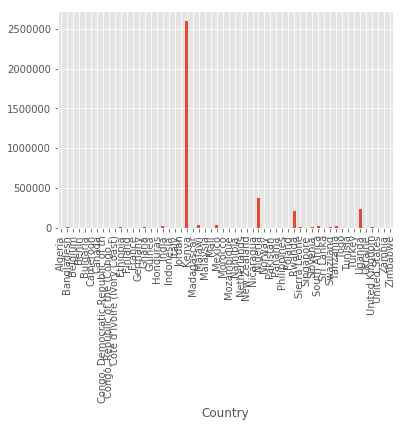

In [182]:
#total revenue per country in 2017
%matplotlib inline
data2017.TotalRevenue.groupby(data2017['Country']).sum().plot(kind = 'bar')

ASSUMPTIONS USED IN THE ANALYSIS
1.New clients get their own unique customer id hence an increase in number of customer ids reflects acquisition of new customers.
 

In [ ]:
RECOMMENDATIONS FROM THE ANALYSIS
1.Given the financial services sector is the 5th largest revenue generator, keen interest should be put on finance sector which has the least revenue generated yet they are related sectors.
2.The company should review the business development team to identify reasons for lack of acquisition of new clients in 2017.
3. 